In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

In [18]:
# Colaboratory 使用雲端硬碟檔案 : 安裝 pydrive 模組
# 取得檔案共用連結 → 網址「id=」後面的「1_wYrImZeWPIbIXaDDkfqebNg6Yc18pl3」就是檔案連結碼。
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1RAEXRsO36LpXHToxB85RrfBFtNLWwUqQ'  #雲端硬碟檔案連結碼
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('MNIST_train.csv')
train = pd.read_csv("MNIST_train.csv")
print(train)

       label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0          1       0       0       0  ...         0         0         0         0
1          0       0       0       0  ...         0         0         0         0
2          1       0       0       0  ...         0         0         0         0
3          4       0       0       0  ...         0         0         0         0
4          0       0       0       0  ...         0         0         0         0
...      ...     ...     ...     ...  ...       ...       ...       ...       ...
41995      0       0       0       0  ...         0         0         0         0
41996      1       0       0       0  ...         0         0         0         0
41997      7       0       0       0  ...         0         0         0         0
41998      6       0       0       0  ...         0         0         0         0
41999      9       0       0       0  ...         0         0         0         0

[42000 rows x 7

In [22]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1GWsH5zCeEOgNSDd-ObTrLQS0HEi8O6Is'  #雲端硬碟檔案連結碼
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('MNIST_test.csv')
test = pd.read_csv("MNIST_test.csv")
print(test)

       pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0           0       0       0       0  ...         0         0         0         0
1           0       0       0       0  ...         0         0         0         0
2           0       0       0       0  ...         0         0         0         0
3           0       0       0       0  ...         0         0         0         0
4           0       0       0       0  ...         0         0         0         0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
27995       0       0       0       0  ...         0         0         0         0
27996       0       0       0       0  ...         0         0         0         0
27997       0       0       0       0  ...         0         0         0         0
27998       0       0       0       0  ...         0         0         0         0
27999       0       0       0       0  ...         0         0         0         0

[28

In [0]:
train = pd.read_csv("MNIST_train.csv")
test = pd.read_csv("MNIST_test.csv")

Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1)
X_train = X_train / 255.0
X_test = test / 255.0
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
Y_train = to_categorical(Y_train, num_classes = 10)

In [0]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']

# convolution-subsambling pairs

In [0]:
# 建立卷積神經網路
nets = 3
model = [0] *nets

for j in range(3):
    model[j] = Sequential()
    model[j].add(Conv2D(24,kernel_size=5,padding='same',activation='relu',
            input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
    if j>0:
        model[j].add(Conv2D(48,kernel_size=5,padding='same',activation='relu'))
        model[j].add(MaxPool2D())
    if j>1:
        model[j].add(Conv2D(64,kernel_size=5,padding='same',activation='relu'))
        model[j].add(MaxPool2D(padding='same'))
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [26]:
# 創建驗證集
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.333)
# T訓練網路
history = [0] * nets
names = ["(C-P)x1","(C-P)x2","(C-P)x3"]
epochs = 20
for j in range(nets):
    history[j] = model[j].fit(X_train2,Y_train2, batch_size=80, epochs = epochs, 
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['acc']),max(history[j].history['val_acc']) ))

CNN (C-P)x1: Epochs=20, Train accuracy=0.99996, Validation accuracy=0.98656
CNN (C-P)x2: Epochs=20, Train accuracy=0.99996, Validation accuracy=0.99028
CNN (C-P)x3: Epochs=20, Train accuracy=0.99996, Validation accuracy=0.99142


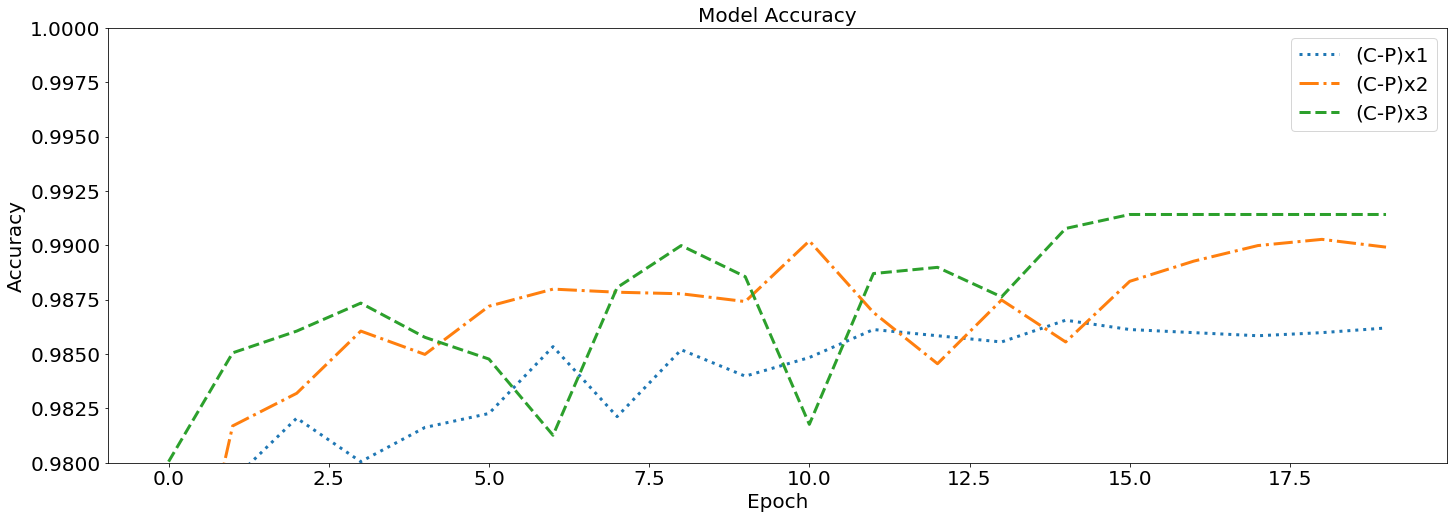

In [28]:
# 繪製精準率
plt.figure(figsize=(24,8))
for i in range(nets):
    plt.plot(history[i].history['val_acc'],linestyle=styles[i],linewidth=3)
plt.title('Model Accuracy',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Epoch',fontsize=20)
plt.legend(names, loc='best',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.savefig("MNIST_CNN (C-P).jpg", dpi=300)
plt.show()

# feature maps

In [0]:
nets = 6
model = [0] *nets
for j in range(6):
    model[j] = Sequential()
    model[j].add(Conv2D(j*8+8,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
    model[j].add(Conv2D(j*16+16,kernel_size=5,activation='relu'))
    model[j].add(MaxPool2D())
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [30]:
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.333)
history = [0] * nets
names = ["8 maps","16 maps","24 maps","32 maps","48 maps","64 maps"]
epochs = 20
for j in range(nets):
    history[j] = model[j].fit(X_train2,Y_train2, batch_size=80, epochs = epochs, 
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['acc']),max(history[j].history['val_acc']) ))

CNN 8 maps: Epochs=20, Train accuracy=0.99964, Validation accuracy=0.98706
CNN 16 maps: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.98956
CNN 24 maps: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.99128
CNN 32 maps: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.99028
CNN 48 maps: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.99113
CNN 64 maps: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.99163


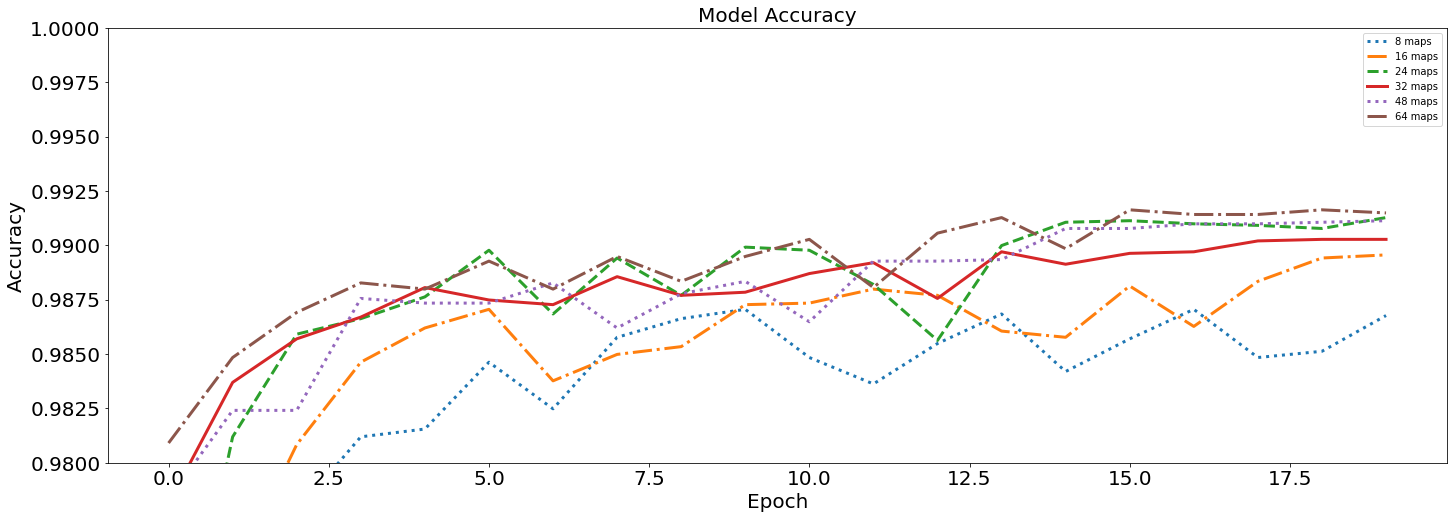

In [31]:
plt.figure(figsize=(24,8))
for i in range(nets):
    plt.plot(history[i].history['val_acc'],linestyle=styles[i],linewidth=3)
plt.title('Model Accuracy',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Epoch',fontsize=20)
plt.legend(names, loc='best')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.savefig("MNIST_CNN (maps).jpg", dpi=300)
plt.show()

# dense layer

In [0]:
nets = 8
model = [0] *nets

for j in range(8):
    model[j] = Sequential()
    model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
    model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
    model[j].add(MaxPool2D())
    model[j].add(Flatten())
    if j>0:
        model[j].add(Dense(2**(j+4), activation='relu'))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [33]:
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.333)
history = [0] * nets
names = ["0N","32N","64N","128N","256N","512N","1024N","2048N"]
epochs = 20
for j in range(nets):
    history[j] = model[j].fit(X_train2,Y_train2, batch_size=80, epochs = epochs, 
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['acc']),max(history[j].history['val_acc']) ))

CNN 0N: Epochs=20, Train accuracy=0.99986, Validation accuracy=0.98927
CNN 32N: Epochs=20, Train accuracy=0.99979, Validation accuracy=0.98906
CNN 64N: Epochs=20, Train accuracy=0.99996, Validation accuracy=0.98942
CNN 128N: Epochs=20, Train accuracy=0.99996, Validation accuracy=0.99056
CNN 256N: Epochs=20, Train accuracy=0.99996, Validation accuracy=0.99149
CNN 512N: Epochs=20, Train accuracy=0.99996, Validation accuracy=0.99121
CNN 1024N: Epochs=20, Train accuracy=0.99996, Validation accuracy=0.99149
CNN 2048N: Epochs=20, Train accuracy=0.99996, Validation accuracy=0.99192


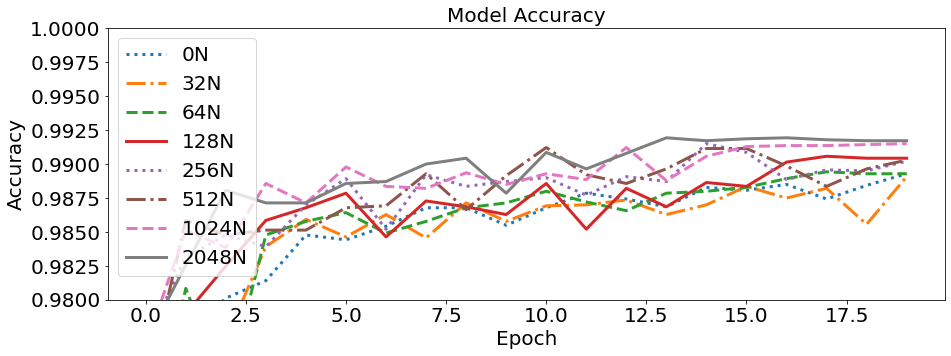

In [34]:
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_acc'],linestyle=styles[i],linewidth=3)
plt.title('Model Accuracy',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Epoch',fontsize=20)
plt.legend(names, loc='best',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.savefig("MNIST_CNN (DS).jpg", dpi=300)
plt.show()

# dropout

In [0]:
nets = 8
model = [0] *nets

for j in range(8):
    model[j] = Sequential()
    model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
    model[j].add(Dropout(j*0.1))
    model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
    model[j].add(MaxPool2D())
    model[j].add(Dropout(j*0.1))
    model[j].add(Flatten())
    model[j].add(Dense(128, activation='relu'))
    model[j].add(Dropout(j*0.1))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [36]:
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.333)
history = [0] * nets
names = ["D=0","D=0.1","D=0.2","D=0.3","D=0.4","D=0.5","D=0.6","D=0.7"]
epochs = 30
for j in range(nets):
    history[j] = model[j].fit(X_train2,Y_train2, batch_size=80, epochs = epochs, 
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['acc']),max(history[j].history['val_acc']) ))

CNN D=0: Epochs=30, Train accuracy=0.99996, Validation accuracy=0.99070
CNN D=0.1: Epochs=30, Train accuracy=0.99971, Validation accuracy=0.99135
CNN D=0.2: Epochs=30, Train accuracy=0.99900, Validation accuracy=0.99256
CNN D=0.3: Epochs=30, Train accuracy=0.99729, Validation accuracy=0.99285
CNN D=0.4: Epochs=30, Train accuracy=0.99479, Validation accuracy=0.99335
CNN D=0.5: Epochs=30, Train accuracy=0.98861, Validation accuracy=0.99278
CNN D=0.6: Epochs=30, Train accuracy=0.98090, Validation accuracy=0.99156
CNN D=0.7: Epochs=30, Train accuracy=0.96612, Validation accuracy=0.98899


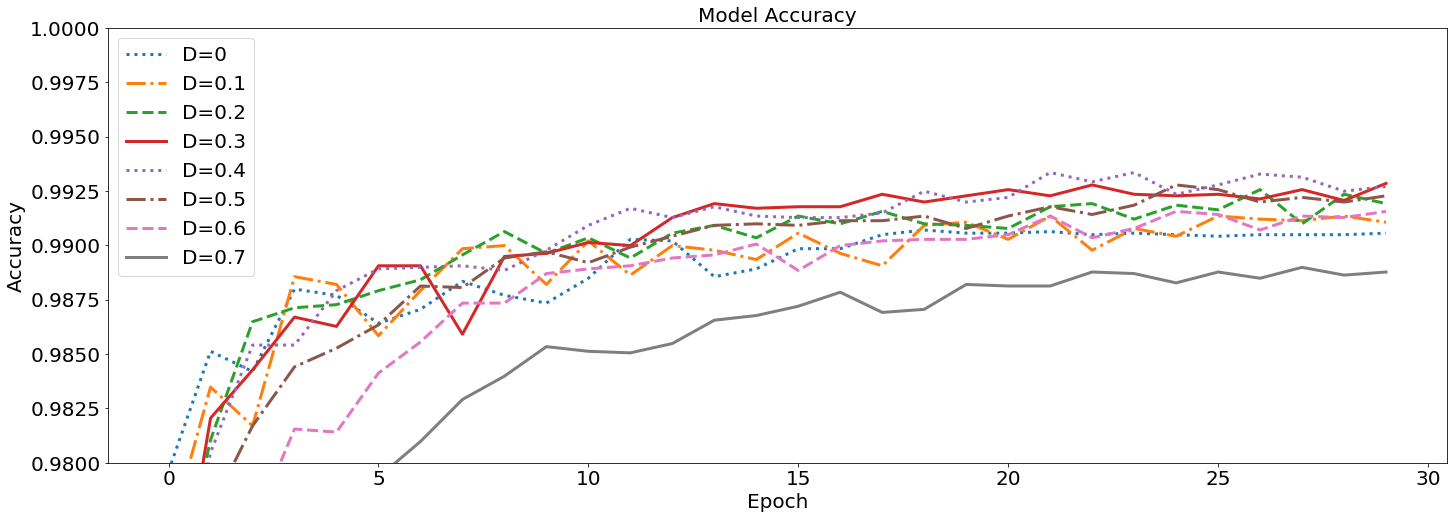

In [37]:
plt.figure(figsize=(24,8))
for i in range(nets):
    plt.plot(history[i].history['val_acc'],linestyle=styles[i],linewidth=3)
plt.title('Model Accuracy',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Epoch',fontsize=20)
plt.legend(names, loc='best',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.savefig("MNIST_CNN (drop).jpg", dpi=300)
plt.show()

# advanced features

In [0]:
nets = 5
model = [0] *nets

j=0
model[j] = Sequential()
model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
model[j].add(MaxPool2D())
model[j].add(Dropout(0.4))
model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
model[j].add(MaxPool2D())
model[j].add(Dropout(0.4))
model[j].add(Flatten())
model[j].add(Dense(128, activation='relu'))
model[j].add(Dropout(0.4))
model[j].add(Dense(10, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [0]:
j=1
model[j] = Sequential()
model[j].add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model[j].add(Conv2D(32,kernel_size=3,activation='relu'))
model[j].add(MaxPool2D())
model[j].add(Dropout(0.4))
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(MaxPool2D())
model[j].add(Dropout(0.4))
model[j].add(Flatten())
model[j].add(Dense(128, activation='relu'))
model[j].add(Dropout(0.4))
model[j].add(Dense(10, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [0]:
j=2
model[j] = Sequential()
model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
model[j].add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(Dropout(0.4))
model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
model[j].add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(Dropout(0.4))
model[j].add(Flatten())
model[j].add(Dense(128, activation='relu'))
model[j].add(Dropout(0.4))
model[j].add(Dense(10, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [0]:
j=3
model[j] = Sequential()
model[j].add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model[j].add(BatchNormalization())
model[j].add(Conv2D(32,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))
model[j].add(Flatten())
model[j].add(Dense(128, activation='relu'))
model[j].add(Dropout(0.4))
model[j].add(Dense(10, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [0]:
j=4
model[j] = Sequential()

model[j].add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model[j].add(BatchNormalization())
model[j].add(Conv2D(32,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))

model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))

model[j].add(Flatten())
model[j].add(Dense(128, activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))
model[j].add(Dense(10, activation='softmax'))

model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [43]:
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.2)
history = [0] * nets
names = ["basic","32C3-32C3","32C5S2","both+BN","both+BN+DA"]
epochs = 35
for j in range(nets-1):
    history[j] = model[j].fit(X_train2,Y_train2, batch_size=64, epochs = epochs,  
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['acc']),max(history[j].history['val_acc']) ))
    
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

j = nets-1
history[j] = model[j].fit_generator(datagen.flow(X_train2,Y_train2, batch_size=64), 
    epochs = epochs, steps_per_epoch = X_train2.shape[0]//64,
    validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
    names[j],epochs,max(history[j].history['acc']),max(history[j].history['val_acc']) ))

CNN basic: Epochs=35, Train accuracy=0.99509, Validation accuracy=0.99393
CNN 32C3-32C3: Epochs=35, Train accuracy=0.99708, Validation accuracy=0.99417
CNN 32C5S2: Epochs=35, Train accuracy=0.99887, Validation accuracy=0.99381
CNN both+BN: Epochs=35, Train accuracy=0.99875, Validation accuracy=0.99417
CNN both+BN+DA: Epochs=35, Train accuracy=0.99521, Validation accuracy=0.99619


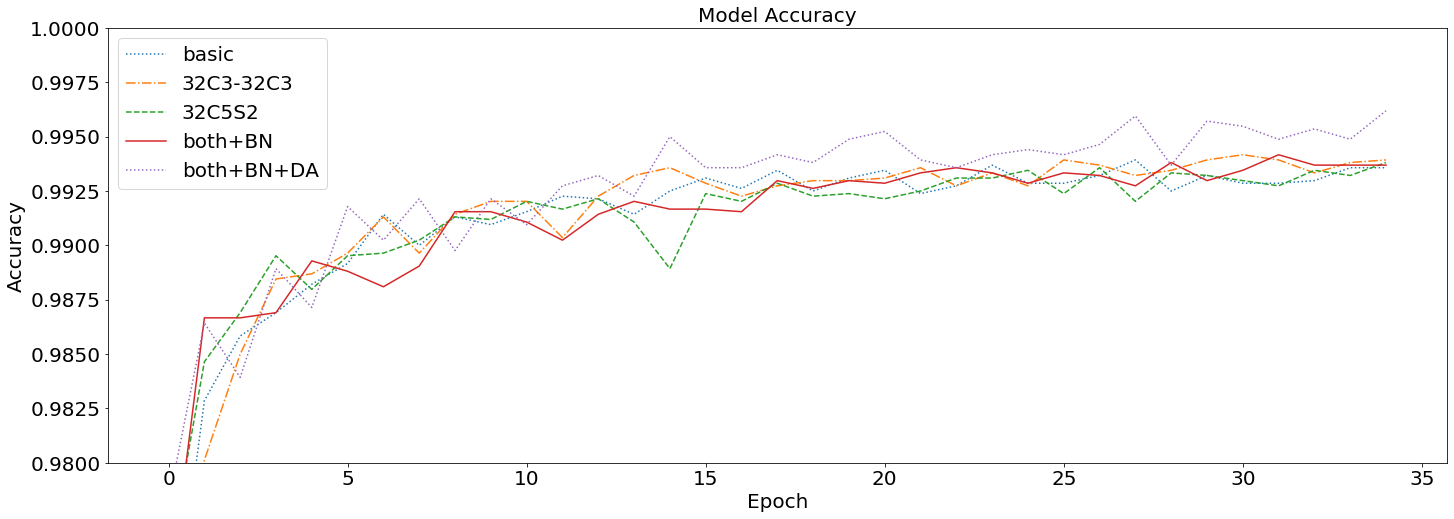

In [44]:
plt.figure(figsize=(24,8))
for i in range(nets):
    plt.plot(history[i].history['val_acc'],linestyle=styles[i])
plt.title('Model Accuracy',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Epoch',fontsize=20)
plt.legend(names, loc='best',fontsize=20)
axes = plt.gca()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
axes.set_ylim([0.98,1])
plt.savefig("MNIST_CNN (AF).jpg", dpi=300)
plt.show()

# conclusion

The best CNN found from the experiments here becomes
784 - [32C3-32C3-32C5S2] - [64C3-64C3-64C5S2] - 128 - 10
with 40% dropout, batch normalization, and data augmentation added